# Programming Exercise 1: Linear Regression

```
by Seokkyu Kong
Date: 2016-03-06
Summary: 

1) Andrew Ng 교수의 강의: https://www.coursera.org/learn/machine-learning/
2) Coursera machine learning (Prof. Andrew Ng) 강의 내용과 assignment는 octave(matlab)으로 이루어진다. 
3) 복습차원에서 해당 코드를 python으로 구현해본다.
4) 모든 내용(도표, 수식, 텍스트)은 강의 내용 및 과제에서 가져왔음을 알린다.
```

python 작업 시 참고한 자료: Numpy 와 MATLAB 비교

- [Numpy for Matlab users #1](https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html)
- [NumPy for MATLAB users #2](http://mathesaurus.sourceforge.net/matlab-numpy.html)

## Introduction

이 연습문제에서는 Linear Regression을 구현하고, 어떻게 동작하는지 확인한다. 이 프로그래밍 연습문제를 시작하기 전에, 비디오 강의를 보고 연관된 토픽에 대한 review 문제를 완료할 것을 강력히 권장한다.


## Files included in this exercise

연습문제를 통해서, 당신은 스크립트 ex1.m과 ex1_multi.m을 사용할 것이다. 이들 스크립트는 문제에 대한 데이터셋을 설정하고 당신이 작성하게 될 함수를 호출한다. 당신은 이들 스크립트 중 어떤 것도 수정할 필요는 없다. 단지 다른 파일에 있는 함수를 수정하기만 하면 되는데, 이 과제에 있는 지시문을 따르면 된다.

이 프로그래밍 연습문제를 위해서, 당신은 연습문제의 첫번째 부분을 완성할 필요가 있는데 **하나의 변수를 가진 linear gression을 구현하면** 된다. 연습문제의 두번째 부분은, 옵션인데, **다중 변수를 가진 linear regression을 언급한다.**

### Where to get help





## 1 Simple Octave/MATLAB function

ex1.m의 첫번째 부분은 Octave/MATLAB 문법 연습을 주고 과제 제출 절차에 대해 연습한다. 파일 warmUpExercise.m 에서, Octave/MATLAB 함수의 개요를 볼 수 있다. 

다음 코드를 채움으로써 5 x 5 identity 행렬을 반환하도록 수정하라.

```
A = eye(5);
```

작성을 마친 후에, ex1.m 을 실행하라. (당신이 올바른 디렉토리에 있다고 가정한다면, "ex1"을 Octave/MATLAB prompt에서 입력하라) 그러면 당신은 아래와 유사한 출력을 볼 수 있을 것이다.

```
ans =
Diagonal Matrix
1 0 0 0 0
0 1 0 0 0
0 0 1 0 0
0 0 0 1 0
0 0 0 0 1
```

이제 ex1.m은 당신의 어떤 키라도 누를때까지 쉬고 있을 것이다. 어떤 키라도 누르면 과제의 다음 부분을 위해서 코드를 실행한다. 만약 중간에 멈추고 싶다면, ctrl-c를 누르면 실행 중간에 프로그램을 중단할 것이다.

### 1.1 Submitting Solutions

연습문제의 하나의 파트를 완성한 이후에, 점수 평가를 위해서 솔루션을 제출할 수 있는데, Octave/MATLAB 명령어 라인에서 submit 을 타이핑하면 된다. 제출 스크립트는 당신에게 로그인 e-mail과 제출 token을 입력하도록 요구한다. submission token은 과제 웹 페이지에서 얻을 수 있다.

You should now submit your solutions.

당신은 여러번 당신의 솔루션을 제출할 수 있는데, 우리는 가장 높은 점수만 고려할 것이다.

In [37]:
%pylab inline

# matrix 자료처리와 그래프
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [38]:
# Machine Learning Online Class - Exercise 1: Linear Regression

def warmUpExercise():
    """
    예제 함수인데 5x5 identity 행렬을 반환한다.
    """
    
    # ============= YOUR CODE HERE ==============
    A = np.eye(5)
    
    return A

#  ==================== Part 1: Basic Function ====================
print('Running warmUpExercise ... ')
print('5x5 Identity Matrix: ')

warmUpExercise()


Running warmUpExercise ... 
5x5 Identity Matrix: 


array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

## 2. Linear regression with one variable

여기서는 하나의 변수를 가진 linear regression을 구현해서 음식 트럭의 이윤을 예측한다고 하자. 당신은 식당 프랜차이즈의 CEO이고 새로운 아웃렛을 오픈하기 위해 여러 도시를 고려하고 있다고 하자. 체인은 이미 여러 도시에 트럭들을 가지고 있고 각 도시로부터 이윤과 인구수에 대한 데이터를 가지고 있다.

당신은 다음에 확장할 도시를 선택하는데 도움이 되기 위해서 이 데이터를 사용하고 싶을 것이다.

파일 ex1data1.txt는 분석을 위한 데이터인데, 첫번째 컬럼은 도시의 인구수이고 두번째 컬럼은 해당 도시에서 음식 트럭의 이윤이다. 이윤에 대한 마이너스 값은 손실을 의미한다.

ex1.m 스크립트는 당신을 위해서 이 데이터를 이미 로드했다.

### 2.1 Plotting the Data

어떤 작업을 시작하기 전에 데이터를 그래프로 그려보는 것은 데이터를 이해하는데 종종 도움이 된다. 이 데이터에 대해서 산점도를 그리는데, 이윤과 인구수 2가지 속성을 가지고 있기 때문이다. (당신이 실제 생활에서 마주치게 될 많은 다른 문제들은 다차원이고 2-d plot 상에 그려질 수 없다.)

ex1.m 에서, 데이터셋은 데이터 파일에서 로드되어 변수 X와 y에 저장된다:

```
data = load('ex1data1.txt');
X = data(:, 1); y = data(:, 2);
m = length(y);
```

다음, 스크립트는 plotData 함수를 호출해서 데이터의 산점도를 생성하게 된다. 당신의 작업은 plotData.m을 완성해서 plot을 그리는 것이다. 파일을 수정해서 다음 코드로 채워 넣어라.

```
plot(x, y, 'rx', 'MarkerSize', 10);
ylabel('Profit in $10,000s');
xlabel('Population of City in 10,000s');
```

이제, ex1.m을 실행하면, 우리의 끝에 있는 결과는 Figure 1과 같이 보여야 하는데, 동일한 "x" 마커와 축의 라벨을 가지고 있다.

plot 명령어에 대해서 더 배우고 싶다면 help plot 이라고 Octave/MATLAB 명령어 프롬프트에 타이핑 하던가 또는 온라인 상에서 plotting documentation을 검색해 보아라. (마커를 빨간색 "x"로 변경하기 위해서, 우리는 옵션 'rx'를 plot 명령어와 함께 사용했다. 즉, plot(..,[your options here],..,'rx');)


Figure 1: Scatter plot of training data

(97, 1)


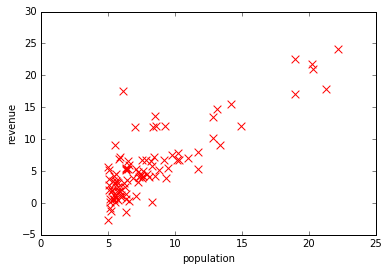

In [39]:
# ======================= Part 2: Plotting =======================

def plotData(x, y):
    """
    새로운 figure에 데이터 포인트 x와 y를 그린다.
    인구수와 이윤에 대한 축 라벨을 준다.
    """

    plt.figure()
    # XXX: scatter(): 산점도를 그린다.
    # c: 색상, s: 사이즈, marker: 표시모양
    plt.scatter(x, y, marker='x', c='r', s=60)
    plt.xlabel('population')
    plt.ylabel('revenue')
    #plt.show()

# *************************************************************************
# XXX: pandas에서 읽은 데이터는 항상 np.array 또는 np.matrix로 변환한다. 
# 그렇지 않으면 데이터 추출 시 TypeError: unhashable type: 'slice' 오류 발생함
# pandas에서는 컬럼 추출 시 data[column_index]와 같은 식으로 사용한다.
# *************************************************************************
# data: 97x2
# 첫번째 컬럼은 데이터 x, 두번째 컬럼은 label y
# import pandas as pd
#data = pd.read_csv('./ex1data1.txt', header=None)

# ****************************************************
# XXX: np.loadtxt(): , 로 구분된 텍스트 데이터 읽기
# ****************************************************
data = np.loadtxt('./ex1data1.txt', delimiter=',')

X = data[:,0:1]
y = data[:,1]
m = np.size(X, 0) # == X.shape[0], np.shape(X)

print(X.shape)

plotData(X, y)

### 2.2 Gradient Descent

여기에서는 gradient descent를 이용해서 데이터 셋에 대한 linear regression parameter $ \theta $를 fit(적절한 값을 맞추어서 구하다) 하게 될 것이다.

##### 2.2.1 Update Equations

**linear regression의 목적은 cost function을 최소화 시키는 것이다.**

$ J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})^{2} - y^{(i)}) $

여기서 **가설함수 hypothesis $ h_{\theta }(x) $ 는 linear model로 주어진다.**

$ h_{\theta}(x) = \theta^Tx = \theta_{0} + \theta_{1}x_{1} $


**모델의 파라미터는 $ \theta_{j} $ 값이다.** **이들 값은 cost $ J(\theta) $를 최소화 하기 위해 조절하는 값들이 된다.** (역주, 즉, 이 값들을 조절해서 cost $ J(\theta) $ 를 최소화 하는 $ \theta $ 값을 찾는다.) 

이렇게 하기 위한 한가지 방법은 **batch gradient descent algorithm**을 사용하는 것이다. 

batch gradient descent에서, 각각의 반복은 업데이트를 수행하는데 

$ \theta_{j} := \theta_{}j - \alpha \frac{1}{m}\sum_{i=1}^{m} ( h_{\theta}(x^{(i)}) - y^{(i)}   )x_{j}^{(i)}  $ (**동시에 모든 j에 대해서 $ \theta_{j} $ 를 업데이트 한다**)

gradient descent의 각 단계에서 파라미터 theta.j는 cost J를 가장 작게 하는 최적화 값으로 점점 가까워진다.

__Implementation Note__: 우리는 각각의 example을 X 행렬의 row로 저장한다. 따라서 절편 항목 intercept term 인 theta0 는 X 행렬에 첫번째 컬럼으로 모두 1인 컬럼벡터를 추가하면 되고, theta0를 단순히 다른 feature로 다룰 수 있게 해준다.



#### 2.2.2 Implementation

ex1.m 에서 linear regression에 대한 데이터를 이미 준비했다. 다음 라인에서, 우리는 우리의 데이터에 또 다른 차원을 추가해서 $ \theta_{0} $ 절편 항목을 수용한다. 우리는 또한 초기 파라미터를 0으로 설정하고 학습률 learning rate 인 alpha는 0.01로 한다.

```
X = [ones(m, 1), data(:,1)]; % Add a column of ones to x
theta = zeros(2, 1); % initialize fitting parameters

iterations = 1500;
alpha = 0.01;
```

#### 2.2.3 Computing the cost $ J(\theta) $

**cost function J(theta)를 최소화하기 위해 gradient descent를 수행하면서, cost를 계산한 후 수렴하는지 모니터링 하는 것이 도움이 된다.** 이 섹션에서는 J(theta)를 계산하는 함수를 구현하고 gradient descent의 구현이 수렴하는지 체크할 것이다. 

다음 과제는 computeCost.m 내의 코드를 완성하는 것인데, 그것은 J(theta)를 계산하는 함수이다. 이 작업을 하면서, **기억할 것은 변수 X와 y는 스칼라 scalar 값이 아니고, 트레이닝 셋에서 example를 나타내는 rows로 구성된 행렬이라는 것이다.**

cost는 32.07이 될 것이다.




In [40]:
# =================== Part 3: Gradient descent ===================

# ********************************************************************
# XXX: np.ones 사용 시 생성할 매트릭스 포맷을 그대로 전달하게끔 습관화한다.
# np.ones, hstack 모두 인자를 하나만 받는다. ex: np.ones(a), hstack(b)
# ********************************************************************
# 절편(intercept) 항목을 추가한다.

print('Running Gradient Descent ...')

# 미리 절편이 추가될 컬럼을 포함한 행렬을 준비하고...
X = np.zeros((m, 2))
X[:, 0] = np.ones(m) # 1의 컬럼을 X에 추가한다.
X[:, 1] = data[:, 0] # fitting 파라미터를 초기화한다.

# 아래 코드도 같은 결과임.
#X = hstack((np.ones((m, 1)), data[:, 0]))

theta = np.zeros(2)

Running Gradient Descent ...


In [41]:

def computeCost(X, y, theta):
    """
    linear regression에 대한 비용 cost를 계산한다.
    X와 y에 있는 데이터 포인트를 fit 시키기 위해서 
    theta를 linear regression에 대한 파라미터로 사용하고 비용을 계산한다.
    """
    # 유용한 값들을 초기화 한다.
    m, n = X.shape
    
    # 아래 변수를 올바르게 반환해야 한다.
    J = 0
    
    # ====================== YOUR CODE HERE ======================
    # 특정 theta에 대한 cost를 계산한다.
    # J를 cost로 설정해야 한다.
    
    # X: 97x2, theta: 2x1
    prediction = X.dot(theta)

    # XXX: 실수 연산할 때는 반드시 실수를 사용한다. 예: 2(X), 2.0(O)
    error = (prediction - y)
    J = 1 / (2.0 * m) * np.sum(error ** 2)
    
    return J

# 몇 가지 gradient descent 설정을 한다.
iterations = 1500
alpha = 0.01

# 초기값을 계산하고 표시한다.
ans = computeCost(X, y, theta)

print('ans = %0.3f' % ans)
# 답: 32.073

ans = 32.073


#### 2.2.4 Gradient descent

**다음 단계는 gradientDescent.m을 구현하는 것이다.** loop 구조가 사용되었고, 각 반복내에서 단지 theta 만 업데이트 하면 된다.

<font color='blue'>**프로그램 하면서, 최적화하려고 하는 것이 무엇이고 무엇이 업데이트 되는지 이해하고 있는지 확인하라.** **cost J(theta)는 theta에 의해서 파라미터화 된다. X와 y가 아니다.** 즉, __우리는 X와 y가 아닌 theta를 변경함으로써 J(theta)의 값을 최소화 시키는 것이다.__</font>

여기서 제공된 방정식을 참조하고, 잘 모르는 부분은 비디오 강좌를 참조하라.

**gradient descent가 올바르게 동작하는지 확인하는 좋은 방법은 J(theta)의 값을 보고 그 값이 매 단계마다 감소하는지 체크하는 것이다.** **gradientDescent.m의 시작 코드는 매 반복마다 computeCost를 호출하고 그 cost 비용을 출력한다.** 만약 gradinet descent와 computeCost를 올바르게 구현했다면 **J(theta)의 값은 절대 증가하지 않아야 한다. 그리고 알고리즘 끝에 가서는 일정한 값으로 수렴되어야 한다.**

완료 이후, ex1.m 은 마지막 파라미터를 이용해서 linear fit을 plot할 것이다. 이 결과는 Figure 2.와 비슷하게 보일것이다. 

최종 theta값은 35,000과 70,000 명이 사는 지역의 이윤을 예측하기 위해 사용될 것이다. 

예측하기 위해서 명시적인 summation 이나 looping 보다는 행렬 곱셈을 사용하는 것을 주목하라. 이것은 Octave/MATLAB에서 벡터화된 코드의 예제이다.

```
predict1 = [1, 3.5] * theta;
predict2 = [1, 7] * theta;
```

In [42]:
# You should now submit your solutions.

def gradientDescent(X, y, theta, alpha, num_iters):
    """
    theta를 학습하기 위해 gradient descent를 수행한다.
    theta를 업데이트 하는데, num_iters 만큼 learning rate alpha를
    가진 gradient 단계를 수행한다.
    """
    
    # 몇 가지 유용한 값을 초기화한다.
    m = size(y)
    J_history = np.zeros(num_iters)
    
    # ====================== YOUR CODE HERE ======================
    # 지시사항: 파라미터 벡터 theta 상에서 하나의 gradient 단계를 수행한다.
    # Hint: 디버깅하는 동안, cost function (computeCost)와 gradient를
    # 여기서 출력해보는 것은 도움이 될 수 있다.
    
    for iter in range(num_iters):
        
        prediction = X.dot(theta)
        error = prediction - y
        
        delta = (1.0 / m) * error.T.dot(X)
        theta = theta - alpha * delta.T
        
        J_history[iter] = computeCost(X, y, theta)
        
    return theta, J_history

# gradient descent를 실행한다.
theta, j = gradientDescent(X, y, theta, alpha, iterations)

print('Theta found by gradient descent: %f %f' % (theta[0], theta[1]))

"""
In Octave/MATLAB: 

Theta found by gradient descent: -3.630291 1.166362
"""
    
# 최소비용
j[-1]

Theta found by gradient descent: -3.630291 1.166362


4.483388256587725

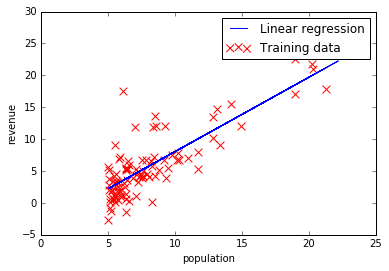

In [43]:
# linear fit을 plot한다.

plotData(X[:, 1], y) # 이전 산점도를 그대로 그린다.

plt.plot(X[:,1], X.dot(theta), '-')
plt.legend(('Linear regression', 'Training data'))
#plt.axis([5, 25, -5, 25]) # 임의로 추가함


In [44]:
# 인구수의 크기가 35,000 그리고 70,000 일때 예측한다.
predict1 = np.sum([1, 3.5] * theta)
print('For population = 35,000, we predict a profit of %f' % (predict1 * 10000))
predict2 = np.sum([1, 7] * theta)
print('For population = 70,000, we predict a profit of %f' % (predict2 * 10000))

"""
For population = 35,000, we predict a profit of 4519.767868
For population = 70,000, we predict a profit of 45342.450129
"""
print

For population = 35,000, we predict a profit of 4519.767868
For population = 70,000, we predict a profit of 45342.450129



### 2.3 Debugging

여기에 gradient descent를 구현하면서 기억할 만한 몇 가지 내용이 있다.

* Octave/MATLAB 배열은 0이 아닌 1부터 인덱스가 시작한다. __만약 theta로 불리는 벡터에 theta0, theta1을 저장한다면 값은 theta(1), tehat(2)가 될 것이다.__

* 실행시에 많은 에러를 본다면, __matrix 연산을 검사해서 matrix 를 더하고 곱할 때 dimension이 일치하는지 확인해야 한다.__ size를 이용해서 변수의 dimension을 출력하는 것은 디버깅하는데 도움을 준다. (역주: python에서는 .shape 를 출력해 보는 것이 도움이 된다.)

* 기본적으로 Octave/MATLAB은 수학 연산을 matrix 연산으로 해석한다. 만약 행렬 곱셈을 원하지 않는다면 "dot" 표시를 추가할 필요가 있다. 예를 들어, A * B는 행렬 곱셈이고, A .* B는 요소 곱셈이다. (역주: python에서는 np.array에서 내적은 A.dot(B)로 하고 np.matrix에서는 A * B로 한다.)

### 2.4 Visualizing J(theta)

cost function J(theta)를 더 잘 이해하기 위해, 2차원 그리드 위에 theta0, theta1 값을 plot해본다. 이 부분을 위해서 새로운 코드를 추가할 필요는 없다. 하지만, 이전에 작성한 코드가 어떻게 이들 이미지를 생성하는 지를 이해해야 한다.

ex1.m의 다음 단계에서, J(theta)를 계산하기 위한 설정 코드가 있는데 당신이 이미 작성한 computeCost 함수를 사용해서 그리드 상의 값을 계산한다.


이들 라인이 실행된 후에, 2-D 배열로 된 J(theta) 값을 갖는다. 스크립트 ex1.m은 이들 값을 사용해서 J(theta)에 대한 surface와 contour plot을 그린다. surf 와 contour 명령어를 이용한다. plot은 Figure 3과 같은 모양이어야 한다.

Figure 3: Cost function J(theta)

**이들 그래프의 목적은 theta0와 theta1에 따라서 J(theta) 값이 어떻게 변하는지를 보여주는 것이다.** cost function J(theta)는 bowl-shaped 모양이고 전역 최소값 global minimum을 갖는다. (3D surface plot 보다는 contour plot에서 보는 것이 더욱 쉽다.) **최소는 theta0와 theta1에 대한 최적의 지점인데, gradient descent를 매번 수행하게 되면 이 지점에 가깝게 움직인다.**


Visualizing J(theta_0, theta_1) ...


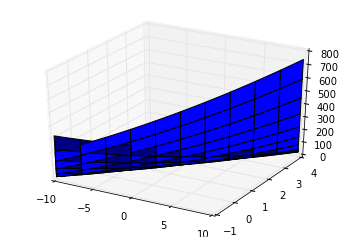

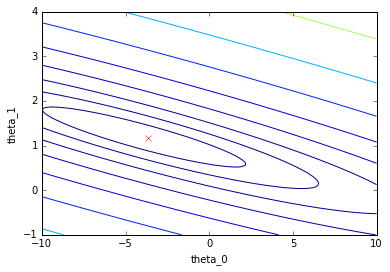

theta1 = -3.630291, theta2 = 1.166362
()


In [45]:
# TODO: 아래 그래프는 작업 중

## ============= Part 4: Visualizing J(theta_0, theta_1) =============
print('Visualizing J(theta_0, theta_1) ...')

# J를 계산하게 될 그리드
theta0_vals = linspace(-10, 10, 100)
theta1_vals = linspace(-1, 4, 100)

# J_vals를 0으로 초기화된 매트릭스로 구성한다.
J_vals = np.zeros((np.size(theta0_vals), np.size(theta1_vals)))

# J_vals값을 채운다.
for i in np.arange(np.size(theta0_vals)):
    for j in np.arange(np.size(theta1_vals)):
        t = [theta0_vals[i], theta1_vals[j]]
        J_vals[i, j] = computeCost(X, y, t)
        
# surf 명령어에서 meshgrids가 동작하는 방식때문에, surf를 호출하기 전에 
# J_vals값을 전치시킬 필요가 있다. 그렇지 않으면 축이 뒤집어 질 것이다.
J_vals = J_vals.T

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals)
plt.show()

# Contour plot
plt.contour(theta0_vals, theta1_vals, J_vals, logspace(-2, 3, 20))
#plt.contour(theta0_vals, theta1_vals, J_vals)
plt.xlabel('theta_0')
plt.ylabel('theta_1')

plt.plot(theta[0], theta[1], 'rx');
plt.show()

print('theta1 = %f, theta2 = %f' % (theta[0], theta[1]))

"""
In Octave:

theta1 = -3.630291, theta2 = 1.166362
"""
print()


## Optional

만약 위의 내용을 성공적으로 마쳤다면, 축하한다! 당신은 이제 linear regression을 이해하고 당신의 데이터셋에 사용할 수 있게 된다.

이 프로그래밍 연습문제의 나머지 부분에서는, 다음의 옵션 연습문제를 포함했다. 이들 연습문제는 위 내용의 더 깊은 이해를 얻는데 도움이 될 것이고, 만약 할 수만 있다면, 이것들 또한 완성하기를 권장한다.


## 3. Linear regression with multiple variables

이 부분에서, 다변수 linear regression을 구현하고 집값을 예측할 것이다. 당신이 당신의 집을 팔고자 한다고 가정하자, 그리고 좋은 시장 가격을 알고 싶다고 하자. 

이렇게 하기 위한 한 가지 방법은 최근에 판매된 집에 대한 정보를 먼저 수집하고 집의 판매 가격을 예측하는 모델을 만들어 보는 것이다.

파일 ex1data2.txt는 오레콘주 포틀랜드에 있는 집의 판매가격에 대한 training set을 포함하고 있다. 첫번째 컬럼은 집의 크기(평방 피트)이고, 두번째 컬럼은 침실의 숫자이다. 그리고 세번째 컬럼은 집의 가격이다.

ex1_multi.m 스크립트는 이 연습문제를 시작하도록 도와준다.

### 3.1 Feature Normalization

ex1_multi.m 스크립트는 데이터셋으로부터 몇몇 데이터를 로딩하고 보여주는 것으로 시작할 것이다. 값들을 보면서, 집 크기는 침대수의 1000배 정도 되는 것을 주목하라. 

**feature의 차수가 다를때, 먼저 feature scaling을 수행하는 것이 gradient descent 수렴을 더욱 빨리 만들 수 있다.**

당신의 작업은 featureNormalize.m의 코드를 완성하는데,

- 데이터넷에서 각 feature의 평균값을 뺀다.
- 평균을 뺀 이후에, 부가적으로 feature값을 scale(나눈다) 하는데 그들 각각의 "표준 편차"로 나눈다.

표준편차는 변동성을 측정하는 하나의 방법인데 특정 하나의 feature의 값의 범위에 얼마나 많은 변동성이 있는지를 측정한다. (대부분의 데이터는 +- 2 표준편차 안이 위치한다.); 이것은 (최대-최소) 값의 범위를 사용하는 또 다른 방법이다. **Octave/MATLAB에서, "std" 함수를 사용해서 표준편차를 계산할 수 있다.** 예를 들어, featureNormalize.m 에서, X(:, 1)은 training set 내의 x1(집 크기)의 모든 값을 포함하고 있는데, std(X(:, 1)) 은 집 크기의 표준 편차를 계산한다.

featureNormalize.m이 호출될 때, x0 = 1에 대응하는 추가적인 컬럼 1은 아직 X에 더해지지 않은 상태이다. (ex1_multi.m을 자세히 보라)

당신은 모든 featurs에 대해서 이 작업을 하게 되고 모든 사이즈의 데이터셋으로도 동작해야 한다 (몇 개의 features 든 / examples). 행렬 X의 각 컬럼은 하나의 feature에 대응한다.

_ You should now submit your solutions._

Implementation Note: **features를 정규화할 때, 정규화를 위해 사용되었던 값들을 저장하는게 중요하다 - 계산에 사용된 평균 값과 표준 편차.** 모델로부터 파라미터를 학습한 이후에, 우리는 종종 우리가 여태 보지 못한 집의 가격을 예측하고자 한다. **주어진 새로운 x 값에 대해서 (거실 면적과 침실 수), 우리는 먼저 training set에서 이전에 계산했던 평균과 표준 편차를 이용해서 x를 정규화 해야 한다.**

In [46]:
## ================ Part 1: Feature Normalization ================

print('Loading data ...')

data = np.loadtxt('ex1data2.txt', delimiter=',')

X = data[:, 0:2]
y = data[:,2]
m = np.size(y, 0)

# 몇몇 데이터 포인트를 출력한다.
print('First 10 examples from the dataset: ')
#print(' x = [%.0f %.0f], y = %.0f', [X(1:10,:) y(1:10,:)]')
for i in np.arange(10):
    print(' x = [%.0f %.0f], y = %.0f' % (X[i, 0], X[i, 1], y[i]))

"""
In Octave/MATLAB:

First 10 examples from the dataset: 
 x = [2104 3], y = 399900 
 x = [1600 3], y = 329900 
 x = [2400 3], y = 369000 
 x = [1416 2], y = 232000 
 x = [3000 4], y = 539900 
 x = [1985 4], y = 299900 
 x = [1534 3], y = 314900 
 x = [1427 3], y = 198999 
 x = [1380 3], y = 212000 
 x = [1494 3], y = 242500
"""
    
    
def featureNormalize(X):
    """
    X내의 features를 정규화한다.
    이 함수는 X의 정규화 버전을 반환하는데, 각 feature의 평균값은 0이 되고 표준 편차는
    1이 된다. 이것은 종종 learning 알고리즘을 가지고 작업할 때 좋은 전처리 단계가
    된다.
    
    피쳐 정규화 함수: 각각의 피쳐는 단위가 다르기 때문에 평균이 0이고 표준편차가 1인
    정규화 값으로 변환된다.
    """
    # *******************************************************************
    # XXX: MATLAB의 std는 N-1을 한다. numpy의 std는 기본이 N을 사용한다.
    # ddof 값이 주어지면 N - ddof를 사용하게 된다.
    # *******************************************************************
    # 0은 column 단위 연산, 1은 row 단위 연산 적용
    # 아래 변수를 올바르게 반환해야 한다.
    mu = np.mean(X, 0)
    sigma = np.std(X, axis=0, ddof=1)
    
    # ====================== YOUR CODE HERE ======================
    # 지시사항: 먼저, 각 feature 차원에 대해서, feature의 평균을 계산하고
    # 데이터셋에서 평균값을 뺀다. 그리고 평균값은 mu에 저장한다.
    # 그 다음에, 각 fetaure에 대한 표준 편차를 계산하고 표준편차로 각 feature를
    # 나눈다. 그리고 표준 편차는 sigma에 저장한다.
    
    # X는 각 컬럼이 하나의 feature이고 각 row가 하나의 example임을 주목하라.
    # 당신은 각 feature에 대한 정규화를 개별적으로 수행해야 한다.
    
    # Hint: 'mean'과 'std' 함수가 유용하다.
    
    # np.tile()을 사용하나 그냥 사용하나 동일한 결과이다.
    # X_norm = (X_norm - np.tile(mu, (m, 1))) / np.tile(sigma, (m, 1)) #아래와 동일 코드
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

# features를 scale하고 평균 0으로 설정한다.
print('Normalizing Features ...')

# X의 피쳐를 정규화 시키고 평균 mu, 표준편차 sigma를 저장한다.
X, mu, sigma = featureNormalize(X)

"""
In Octave:

   0.13001  -0.22368
  -0.50419  -0.22368
   0.50248  -0.22368
  -0.73572  -1.53777
   1.25748   1.09042
"""

# 절편(intercept) 항목을 추가한다.
# *******************************************************************
# XXX: 절편(intercept) 항목 1을 추가하는 방법
# 1) 절편 항목을 포함한 행렬을 만든 후 1 컬럼벡터를 할당
# 2) hstack() 함수 사용: X_norm = hstack((np.ones((m, 1)), X_norm))
# 3) np.column_stack() 함수 사용 => 여기서는 이 함수를 사용한다.
# *******************************************************************
m, n = X.shape
X = np.column_stack((np.ones(m), X))

print(X[0:5, :])


Loading data ...
First 10 examples from the dataset: 
 x = [2104 3], y = 399900
 x = [1600 3], y = 329900
 x = [2400 3], y = 369000
 x = [1416 2], y = 232000
 x = [3000 4], y = 539900
 x = [1985 4], y = 299900
 x = [1534 3], y = 314900
 x = [1427 3], y = 198999
 x = [1380 3], y = 212000
 x = [1494 3], y = 242500
Normalizing Features ...
[[ 1.          0.13000987 -0.22367519]
 [ 1.         -0.50418984 -0.22367519]
 [ 1.          0.50247636 -0.22367519]
 [ 1.         -0.73572306 -1.53776691]
 [ 1.          1.25747602  1.09041654]]


### 3.2 Gradient Descent

이전에, 단일 regression 문제상에서 gradient descent를 구현했다. 이제 유일한 차이는 행렬 X 안에 하나 더 많은 feature가 있다는 것이다. 가설 함수와 batch gradient descent update rule은 변경되지 않는다.

computeCostMulti.m과 gradientDescentMulti.m에 있는 코드를 완성해서 많은 변수를 가진 linear regression에 대한 cost function과 gradient descent를 구현해야 한다.

이전 파트에서 (단일 변수로) 당신의 코드가 이미 다변량을 지원한다면, 여기서 또한 그대로 사용해도 된다.

**당신의 코드가 어떤 수의 features도 지원하고 잘 벡터화되어 있음을 확인해라.**

'size(X, 2)' 를 사용해서 데이터셋 내에 얼마나 많은 features가 있는지 파악할 수 있다.

_You should now submit your solutions._

Implementation Note: 다변량의 경우에, cost function은 다음과 같은 벡터 형태로 또한 쓰여질 수 있다.

[수식]

여기서

[수식]

벡터화된 버전은 Octave/MATLAB과 같은 수치 연산 툴과 함께 작업할 때 효율적이다. 만약 당신이 행렬연산에 전문가라면, 2가지 형태가 동일함을 스스로 증명할 수 있다.


#### 3.2.1 Optional (ungraded) exercise: Selecting learning rates

연습문제 이 부분에서, **데이터셋에 대해 서로 다른 learning rates를 시도해보고 빠르게 수렴하는 learning rates를 찾을 것이다.** ex1_multi.m 을 수정해서 learning rate를 변경할 수 있는데 learning rate를 설정하는 코드 부분을 변경하면 된다.

ex1_multi.m의 다음 단계는 gradientDescent.m 함수를 호출하고 선택된 learning rate로 약 50회 반복해서 gradient descent를 실행하게 된다. 함수는 J(theta)의 히스토리를 벡터 J로 담아서 리턴해야 한다. 마지막 반복 이후에, ex1_multi.m 스크립트는 **반복 횟수별로 J 값을 plot 하게 된다.**

만약 좋은 범위내에서 learning rate를 골라냈다면, plot은 Figure 4와 비슷하게 보일 것이다. 만약 그래프가 매우 다르다면, 특별히 J(theta)의 값이 증가하거나 또는 날아가버린다면, learning rate를 조정해서 다시 시도해 보아야 한다. 

**우리는 leraning rate alpha의 값을 log-scale로 시도해보기를 권장하는데, 이전 값의 약 3배를 나누면 된다 (즉, 0.3, 0.1, 0.03, 0.01 기타 등등).**

아마도 실행시키는 반복 회수도 조정하고 싶을텐데 전체적인 경향을 커브로 보는데 도움이 된다.

Figure 4: Convergence of gradient descent with an appropriate learning rate

Implementation Note: 만약 learning rate가 너무 크다면, J(theta)는 발산하고 'blow up' 할 수 있다. 이들 값은 컴퓨터 계산에 대해 너무 큰 값이 된다. 이런 상황에서, Octave/MATLAB은 NaNs를 반환한다. NaN은 'not a number'를 나타내는데 종종 정의되지 않은 - 무한대와 + 무한대일 때도 발생한다.

Octave/MATLAB Tip: 서로 다른 learning rates가 수렴에 어떻게 영향을 주는지 비교하기 위해서, 서로 다른 learning rates를 동일한 figure에 plot 해보는 것이 도움이 된다. Octave/MATLAB에서, plots 사이에 'hold on' 명령어를 가지고 gradient descent를 여러번 수행하면 가능해진다. 구체적으로, 만약 3개의 서로 다른 alpha 값(당신은 이 보다 더 많은 값으로 시도해야 한다.) 으로 시도해서 비용을 J1, J2 그리고 J3에 저장했다면, 다음 명령어는 그것들을 동일 figure 상에 plot 할 것이다.

```
plot(1:50, J1(1:50), ‘b’);
hold on;
plot(1:50, J2(1:50), ‘r’);
plot(1:50, J3(1:50), ‘k’);
```

마지막 인자 'b', 'r', 그리고 'k'는 plot에 대한 서로 다른 색상을 지정한다.

**learning rate가 변화함에 따라 수렴 곡선에서의 변화를 주목하라.**

작은 learning rate에서, gradient descent는 최적의 값에 수렴하기 위해서 매우 많은 시간이 필요하다는 것을 볼 수 있다. 역으로, 큰 learnign rate에서는, gradient descent 는 수렴하지 않거나 또는 심지어 발산할 수도 있다!


당신이 발견한 최적의 learning rate를 사용해서, ex1_multi.m 스크립트를 실행시키고 gradient descent 가 최종의 theta 값을 찾기 위해 수렴하도록 해라. 그 다음, 이 theta 값을 상요해서 1650 평방 피트의 크기와 3개의 침실을 가진 집의 가격을 예측하라. 

나중에 normal equations의 구현과 이 값을 비교해 볼 수 있다. **예측하기 전에 features를 정규화 하는 것을 잊지 말자.**

_ You do not need to submit solutions for these optional (ungraded) exercises._




In [47]:
## ================ Part 2: Gradient Descent ================
# 지시사항: 우리는 다음의 스타터 코드를 제공했는데, 그것은 특정 
# 학습률 learning rate (alpah)를 가지고 gradient descent를 실행한다.

# 당신의 작업은 먼저 당신의 함수 - computeCost와 gradientDescent가 이미 
# 스타터 코드와 잘 동작하고 다변수도 지원함을 확인해야 한다.

# 그리고 난 다음, 서로 다른 alpha값을 가지고 gradient descent를 실행시켜봐라.
# 그리고 어떤 값이 가장 좋은 결과를 주는지 확인해라.

# 마지막으로, 끝에 있는 코드를 환성해서 1650 sq-ft, 3 br을 가진 집값을 예측한다.

# Hint: 'hold on' 명령어를 사용해서, 동일한 figure 위에 여러 그래프를 plot할 수 있다.

# Hint: 예측시에, 동일한 feature 정규화를 사용했는지 확인하라.


In [51]:
def computeCostMulti(X, y, theta):
    """
    비용함수 J: 다변량 변수를 가진 linear regression에 대한 cost를 계산한다.
    theta를 linear regression에 대한 파마리터로 사용해서 데이터 포인트 x와 y를
    fit 시킨다. 그리고 cost를 계산한다.
    
    다변량 X에 대해서 예상값(predictions)과 실제값(y)의 오차제곱합을 구한다.
    """
    
    # 몇몇 유용한 값 초기화
    m = size(y) # training examples의 갯수
    
    # 아래 변수를 올바르게 반환해야 한다.
    J = 0
    
    # ====================== YOUR CODE HERE ======================
    # 지시사항: 특정 theta에 대한 cost를 계산하고, J에 cost를 설정한다.
    
    # X: 97x2, theta: 2x1
    prediction = X.dot(theta)
    
    error = prediction - y
    sqrError = error ** 2
    J = 1.0 / (2.0 * m) * np.sum(sqrError)
    
    return J


In [52]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    theta를 학습하기 위해 gradient descent를 수행한다.
    이 함수는 learning rate alpha를 가지고 gradient를 num_iters 
    만큼 단계를 취해서 theta를 업데이트 한다.
    
    기울기 최소화 함수: 다변량 X에 대해서 계산
    이후 exercise 2에서 나오는 minimize() 함수와 같은 역할을 한다.
    """
    
    # 변수 초기화
    m = size(y)
    J_history = np.zeros((num_iters, 1))
    
    for iter in range(num_iters):
        # ====================== YOUR CODE HERE ======================
        # 지시사항: 파라미터 벡터 theta 상에 한 번의 gradient를 수행한다.
        # Hint: 디버깅하는 동안, cost function (computeCostMulti)와 
        # gradient를 여기서 출력해보는 것이 도움이 된다.
        
        prediction = X.dot(theta)
        error = prediction - y
        
        delta = (1.0 / m) * error.T.dot(X)
        theta = theta - alpha * delta.T
        
        # 매 반복마다 cost J를 저장한다.
        J_history[iter, 0] = computeCostMulti(X, y, theta)
        
    return theta, J_history

Running gradient descent ...


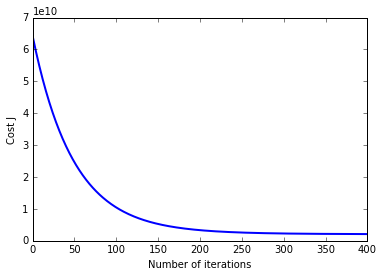

Theta computed from gradient descent: 
 [ 334302.06399328  100087.11600585    3673.54845093]



In [54]:
print('Running gradient descent ...')

# 몇몇 alpha 값을 선택한다.
alpha = 0.01
num_iters = 400

# Theta를 초기화하고 Gradient descent를 실행한다.
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# convergence graph를 plot한다.
plt.plot(J_history, '-b', lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

# gradient descent의 결과를 출력한다.
print('Theta computed from gradient descent: ')
print(' %s' % theta)

"""
In Octave/MATLAB: 

Theta computed from gradient descent:
 334302.063993 
 100087.116006 
 3673.548451
"""
print

my alpha is 0.3
my alpha is 0.1
my alpha is 0.03
my alpha is 0.01
top 5: arr_J


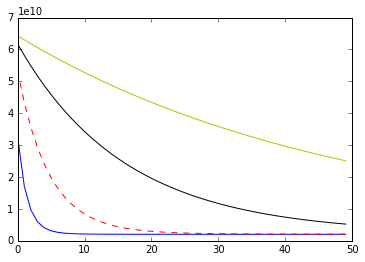

In [55]:

# 최적의 alpha값을 찾는다.
# alpha와 반복횟수를 조절하면서 alpha값을 찾는다.

# 반복에 따른 cost J를 이용해서 최적의 alpha값을 찾는다.
# 50회만 반복 수행한다.
# J_history는 num_iters x 1의 컬럼벡터이다.
arr_alpha = [0.3, 0.1, 0.03, 0.01]
num_iters = 50
arr_J = np.zeros((num_iters, len(arr_alpha)))
i = 0;
for my_alpha in arr_alpha:
    print('my alpha is %s' % my_alpha)
    theta = np.zeros(3)
    theta, J_history = gradientDescentMulti(X, y, theta, my_alpha, num_iters)
    arr_J[:, i] = J_history.T
    i = i + 1
    
print('top 5: arr_J')
arr_J[0:5, :]

# alpha = 0.1 에서 최적의 학습곡선이 보여지고 있다.
plt.plot(arr_J[0:50, 0], 'b')
plt.plot(arr_J[0:50, 1], 'r--')
plt.plot(arr_J[0:50, 2], 'k')
plt.plot(arr_J[0:50, 3], 'y')


In [56]:
# 1650 평방피트의 3개의 침실을 가진 집의 가격을 평가한다.
# ====================== YOUR CODE HERE ======================
# X의 첫번째 컬럼은 모두 1임을 기억해라. 따라서 그것은 정규화될 필요가
# 없다.

# 위에서 구해진 최적의 alpha와 num_iters를 설정한다.
alpha = 0.1
num_iters = 50

# Theta를 초기화하고 Gradient Descent를 실행한다.
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

print('best theta for gradient descent... ')
print(theta)

# Estimate the price of a 1650 sq-ft, 3 br house
price = 0
new_x = np.array([1650, 3])

# x 값을 정규화 시킨다.
new_x = (new_x - mu) / sigma
#new_x = hstack(([np.ones(1), new_x])) # 아래 코드와 동일
new_x = np.append(1, new_x)
print(new_x)

# y(price)를 예측한다.
price = new_x.dot(theta)

print('Predicted price of a 1650 sq-ft, 3 br house (Using gradient descent) %s' % price)


"""
best theta for gradient descent... 
theta =

   3.3866e+05
   1.0413e+05
  -1.7221e+02

new_x =

  -0.44127  -0.22368

new_x =

   1.00000  -0.44127  -0.22368

price =    2.9275e+05
Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $292748.085232
"""
print()

best theta for gradient descent... 
[  3.38658249e+05   1.04127516e+05  -1.72205334e+02]
[ 1.         -0.4412732  -0.22367519]
Predicted price of a 1650 sq-ft, 3 br house (Using gradient descent) 292748.085232
()


### 3.3 Normal Equations

강의 비디오에서, linear gression의 closed-form solution 이 다음과 같음을 배웠다.

$ \theta = (X^{T}X)^{-1}X^{T}y $

**이 공식을 이용하는 것은 어떠한 feature scaling도 요구하지 않고, 한번의 계산으로 정확한 솔루션을 구할 수 있다: gradient descent와 같이 "loop until convergence" 가 없다.**

normalEqn.m 내의 코드를 완성해서 theta를 계산하기 위한 위의 공식을 사용해라. 당신의 features를 scale 할 필요가 없음을 기억해라. 우리는 아직까지는 **X 행렬에 1의 컬럼을 추가할 필요가 있는데 절편 항목 (theta0)를 갖기 위해서이다.**

ex1.m내의 코드는 X에 1컬럼을 추가할 것이다.

_You should now submit your solutions._

_Optional (ungraded) exercise:_ 이제, 이 방법을 사용해서 theta를 발견했다면, 1650-평방 피트의 크기와 침실 3개를 가진 집의 가격을 예측하기 위해 사용해라. 당신은 gradient descent (섹션 3.2.1에서)를 가진 모델 fit을 가지고 얻은 값과 동일한 예측 가격임을 보아야 한다.

In [58]:
## ================ Part 3: Normal Equations ================
# 지시사항: 다음의 코드는 normal equations를 사용해서 closed form 
# 솔루션을 계산한다. normalEqn.m 내의 코드를 완성해야 한다.

# 그렇게 하고난 후, 1650 평방-피트, 3개의 침실을 가진 집의 가격을
# 예측하기 위해 이 코드를 완성해야 한다.

def normalEqn(X, y):
    """
    linear regression에 대한 closed-form solution을 계산한다.
    이 함수는 normal equations를 사용해서 linear regression에 대한
    closed-form solution을 계산한다.
    """
    
    # ====================== YOUR CODE HERE ======================
    # 지시사항: linear regressin에 대한 closed form solution을 계산하는
    # 코드를 완성하고 결과를 theta에 저장하라.
    
    """
    # 역행렬: A.I == linalg.inv(A)

    # 1) 행렬 방식으로 계산
    m, n = X.shape
    X = matrix(X)
    
    y = y.reshape((m, 1))
    y = matrix(y)
    
    theta = (X.T * X).I * X.T * y
    
    """
    
    # 2) numpy의 array 방식으로 계산
    #theta = np.zeros((X.shape[1])) # theta 초기화
    theta = linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    
    
    return theta


# 데이터 로드
#data = pd.read_csv('ex1data2.txt', header=None) # 아래 코드와 동일
#data = np.array(data)
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2]
m = np.size(y, 0)

# 절편(intercept) 항목을 추가한다.
#X = hstack((np.ones((m, 1)), X)) # 아래 코드와 동일
X = np.column_stack((np.ones(m), X))

# normal equation 으로부터 파라미터를 계산한다.
theta = normalEqn(X, y)

# normal equation의 결과를 표시한다.
print('Theta computed from the normal equations: ')
print(' %s ' % theta)


"""
In Octave/MATLAB:

matrix([[ 89597.9095428 ],
        [   139.21067402],
        [ -8738.01911233]])
"""
print

Theta computed from the normal equations: 
 [ 89597.9095428     139.21067402  -8738.01911233] 



In [59]:
# 1650 sq-ft, br3 인 집의 가격을 예측한다.
# ====================== YOUR CODE HERE ======================
# 위에서 gradientdescent 방식으로 구한 가격과 비슷함을 알 수 있다.
price = 0 # 당신은 이 값을 변경해야 한다.

# x featues에 1을 추가한다.
new_x = [1, 1650, 3]
price = sum(new_x * theta)

print('Predicted price of a 1650 sq-ft, 3 br house ')
print('(using normal equations):\n $%f' % price)

"""
In Octave/MATLAB: 

Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
 $293081.464335
"""
print

Predicted price of a 1650 sq-ft, 3 br house 
(using normal equations):
 $293081.464335



## The End